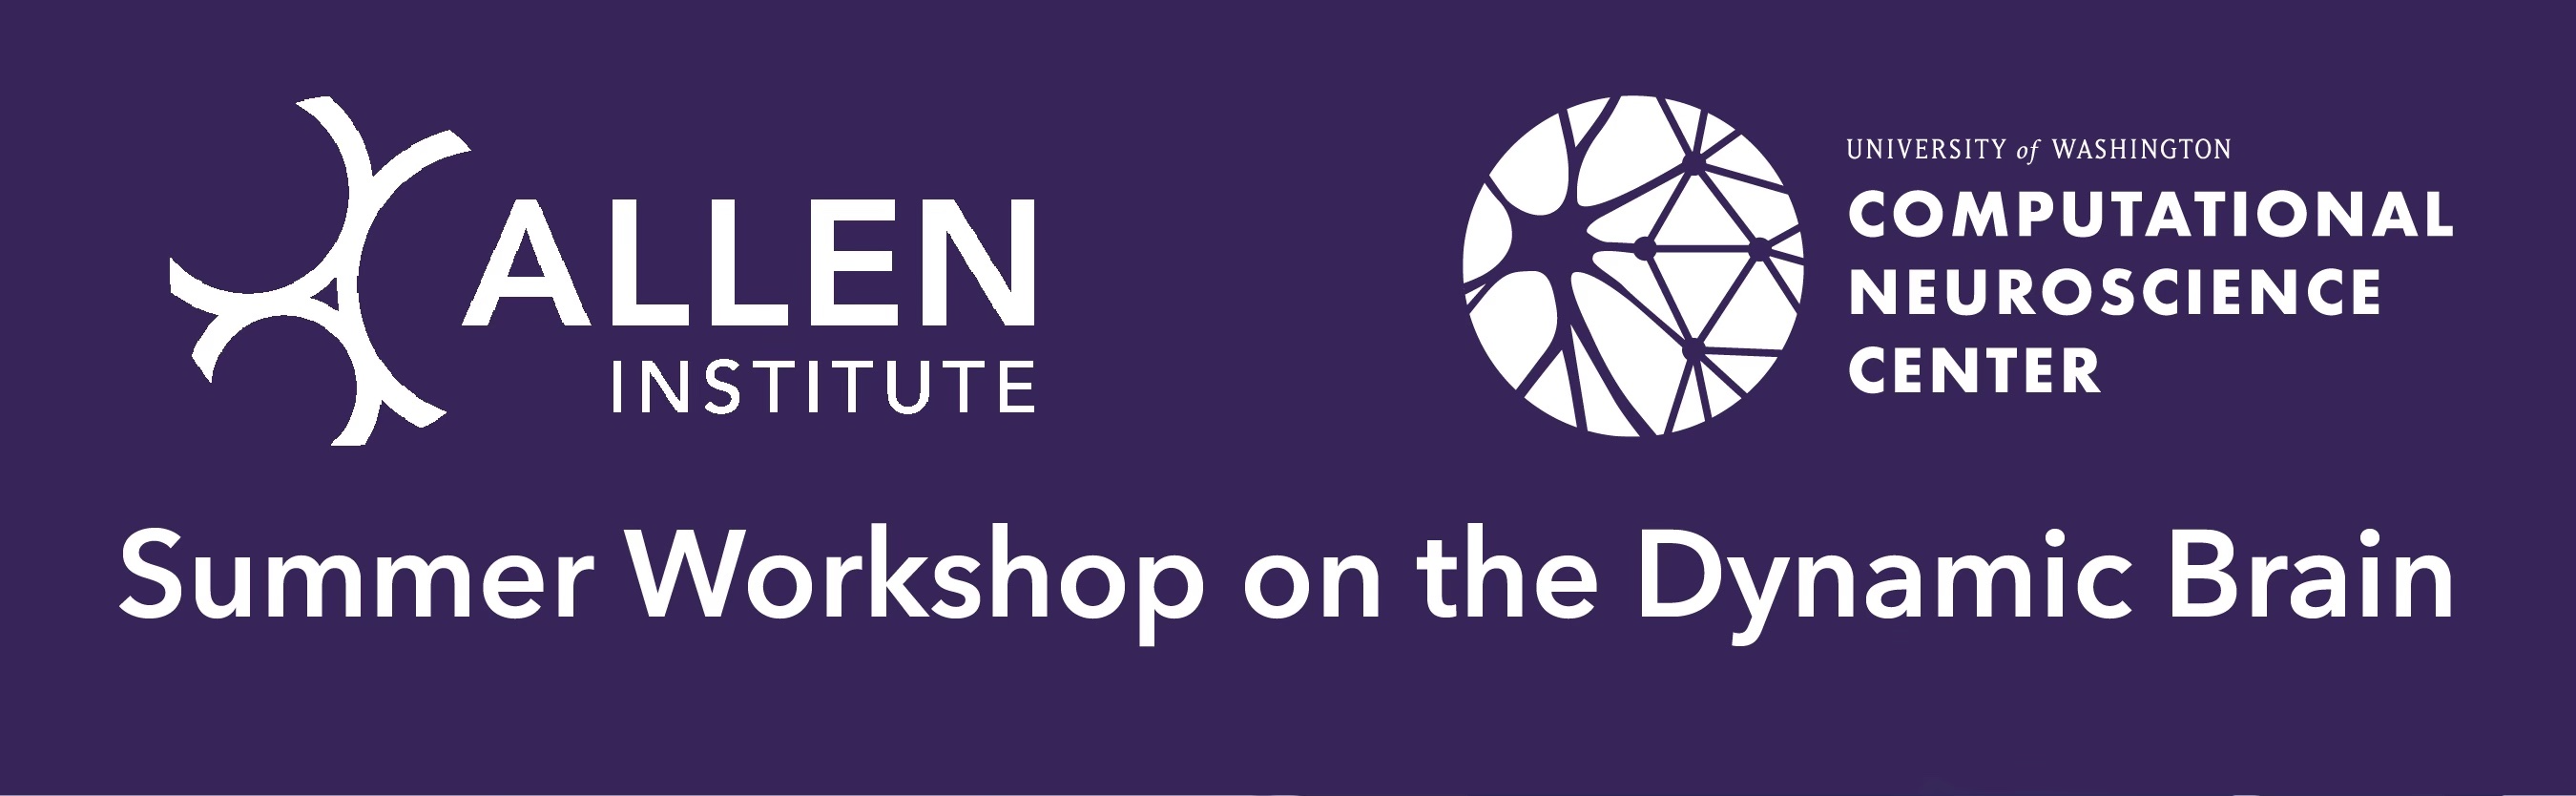

<h1 align="center">DAY 1 Problem Set 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to Behavior Variability and Principal Components Analysis</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Overview</h2>

Today, we have primarily focused on accessing different data assets and creating basic plots for visualizing data. Often times the data we want to visualize is high-dimensional (i.e., consists of many variables that can co-vary based on multiple factors. Examples of this are neural population data with cells that co-vary with respect to specific stimulus conditions. However, identifying which of variables co-vary together and their associated patterns of covariation is a challenge with high-dimensional datasets. 
    
In this problem set, we will explore an unsupervised learning algorithm that succinctly summarizes patterns of covariation known as <b>principal components analysis (PCA)</b>. PCA is broadly used for dimensionality reduction (i.e., reducing high-dimensional data by finding a low-dimensional representation of that data). Additionally, PCA is a powerful tool for both visualizing data and feature extraction. In order to make the PCA algorithm more tangible, let's begin by posing a scientific question that can we gain some intuition on based on one of the datasets we've already accessed - Visual Behavior 2P.
    
### Scientific question

What potential factors contribute to behavioral variability across mice and sessions during change detection task performance and learning? 

### Motivation
This is an important question as neural activity (even in the visual cortex) is both guided by and influences behavior. This feedback loop between visual perception and behavior could be more pronounced during visually-guided behaviors such as the change detection task.  Moreover, mouse-specific factors (e.g., genetics due to variability in cre-lines) have been shown to impact task behaviors and motivational states. Thus, if we're interested in studying how neural activity changes across learning or during task performance, we need to have some basic intuition about how behavioral variables may confound our putative neural signatures of learning or task performance.
    
### Goals
1. Visualize long timescale behavior during task performance  
2. Introduce PCA and its basic concepts
3. Apply PCA to build intuition about the factors contributing to behavioral variablity across mice and sessions

    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Summer Workshop on the Dynamic Brain Data Book </h2> 

The databook is a resource for understanding the various dimensions of the datasets, the methods used, and how to access the data. You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 



In [1]:
# general imports 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np 
%matplotlib inline 

from pathlib import Path
import allensdk

import gc

# This will hide AllenSDK warnings :)
import warnings
warnings.filterwarnings("ignore") 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2>Load the Project Cache</h2>

In [2]:
# import behavior project cache class to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = Path('/root/capsule/data/')

cache = VisualBehaviorOphysProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2>Load the dataset</h2>
    
Let's load behavioral data for the **Visual Behavior** project and plot running behavior and the task block for a single session. 


In [3]:
# Instantiate the project metadata using the AllenSDK 
behavior_sessions = cache.get_behavior_session_table()

In [4]:
# Filter DataFrames for Visual Behavior project 
project = 'VisualBehavior'

# TRAINING_0 is signficantly shorter than all other sessions, so let's exclude this for now
exclude_session_type = 'TRAINING_0_gratings_autorewards_15min'

filtered_behavior_sessions = behavior_sessions[(behavior_sessions.project_code == project)&(behavior_sessions.session_type!=exclude_session_type)] 


In [5]:
filtered_behavior_sessions.head()

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,num_targeted_structures,miss_trial_count,engaged_trial_count,go_trial_count,trial_count,correct_reject_trial_count,false_alarm_trial_count,hit_trial_count,catch_trial_count,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
761294708,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,85,...,<NA>,162,91,216,913,20,10,54,30,2085
761730617,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,86,...,<NA>,107,64,159,964,12,5,52,17,2086
762067130,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,87,...,<NA>,76,101,134,1087,14,5,58,19,2087
762418364,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,88,...,<NA>,180,1,226,775,17,5,46,22,2088
763012686,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,89,...,<NA>,122,67,170,928,12,5,48,17,2089


In [6]:
# What factors do we have access to that could potentially explain behavior variability?
behavior_sessions.columns.values 

array(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures',
       'miss_trial_count', 'engaged_trial_count', 'go_trial_count',
       'trial_count', 'correct_reject_trial_count',
       'false_alarm_trial_count', 'hit_trial_count', 'catch_trial_count',
       'file_id'], dtype=object)

In [7]:
# how many sessions do we have?
behavior_session_ids = filtered_behavior_sessions.index.values

len(behavior_session_ids)

1543

In [8]:
# Let's grab a single session
behavior_session_id = behavior_session_ids[0]

behavior_session = cache.get_behavior_session(behavior_session_id)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">  
    
It's important to keep a record of which dataset plots were created for. Adopting the practice of including default titles with useful metadata will help keep track of this info when generating a large number of plots during exploratory analyses.  


In [9]:
# Using the mouse_id, behavior_session_id, and session_type is helpful!
df = filtered_behavior_sessions.loc[behavior_session_id]

title_template = f'MID: {df.mouse_id} | BSID: {behavior_session_id} | Session-Type: {df.session_type}_Day_{df.prior_exposures_to_session_type}'

title_template

'MID: 412036 | BSID: 761294708 | Session-Type: TRAINING_1_gratings_Day_0'

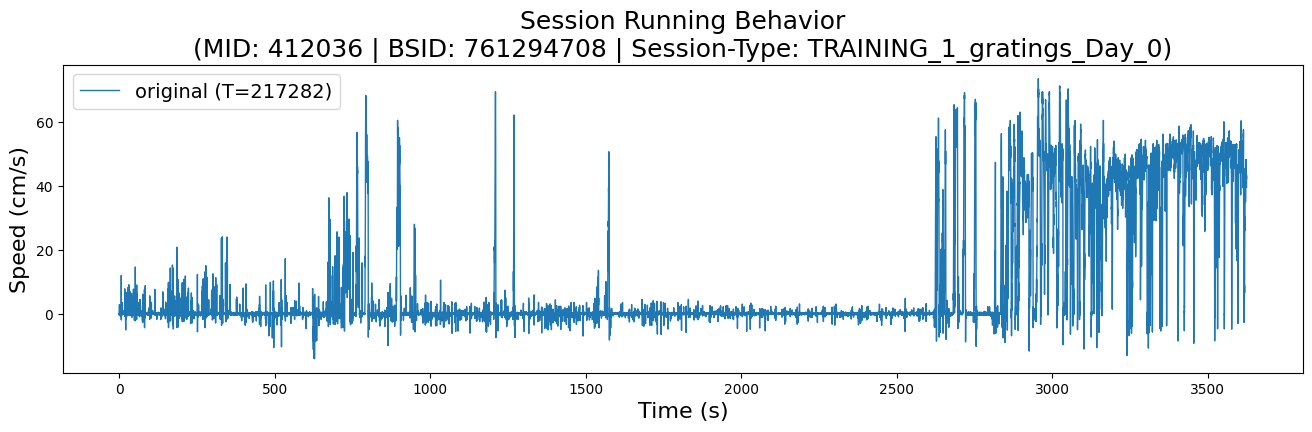

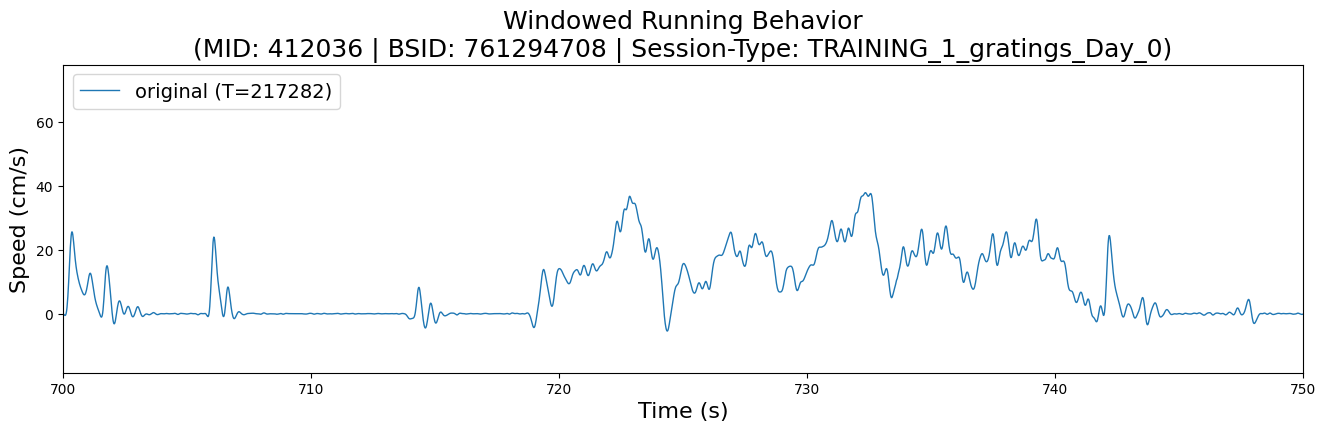

In [10]:
# Let's get the running data for this session and plot it
run_df = behavior_session.running_speed

run_speed = run_df.speed.values
run_times = run_df.timestamps.values


plt.figure(figsize=(16,4))

# original runing trace
plt.plot(run_times, run_speed,lw=1,label=f'original (T={len(run_times)})')


plt.ylabel('Speed (cm/s)',fontsize=16)
plt.xlabel('Time (s)',fontsize=16)
plt.legend(loc='upper left',fontsize=14)

# Add our title template!
plt.title(f'Session Running Behavior\n({title_template})',fontsize=18)

# plot again but choose a window to highlight
xlim = [700,750]
plt.figure(figsize=(16,4))

# original runing trace
plt.plot(run_times, run_speed,lw=1,label=f'original (T={len(run_times)})')


plt.ylabel('Speed (cm/s)',fontsize=16)
plt.xlabel('Time (s)',fontsize=16)
plt.xlim(xlim)

plt.legend(loc='upper left',fontsize=14)

# Add our title template!
plt.title(f'Windowed Running Behavior\n({title_template})',fontsize=18);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">  

We can see two things in the above plots: (1) a single sessions running has both fast timescale patterns (on the order of seconds) and slow timescale patterns (on the order of minutes), and (2) a single running trace can have 200K+ time points!  
    
For this problem set, we will focus on the slow timescale patterns and how these patterns may vary on the timescale of days (session-by-session).
    
<h3> Temporal smoothing </h3>

Since our goal is to study across session variability of slow timescale patterns in running behavior, we don't need to use all of the data points for our analysis. One effective method for reducing the dimensionality of our running traces is to temporally smooth the data. There are many methods for smoothing, but we will focus on using a sliding window average of the running timeseries. Thus, each time point will correspond to the overall running speed during a given windowed interval with fixed duration.  
    
Here are two useful functions we can use to temporally smooth our data. These functions are also included in the `swdb_utils.py` file in \code.

In [11]:
def sliding_window(timestamps, window_size, step_size):
    """
    Generates sliding windows from a sequence with a specified step size.

    Args:
        timestamps (numpy.array or list): Timestamps associated with input variable.
        window_size (int): The size of each sliding window.
        step_size (int): The number of elements to advance the window by in each step.

    Yields:
        (numpy.array or list): A sub-sequence representing the current window.
    """
    if not isinstance(window_size, int) or window_size <= 0:
        raise ValueError("window_size must be a positive integer.")
    if not isinstance(step_size, int) or step_size <= 0:
        raise ValueError("step_size must be a positive integer.")
    if window_size > len(timestamps):
        raise ValueError("window_size cannot be greater than the sequence length.")

    for i in range(0, len(timestamps) - window_size + 1, step_size):
        yield timestamps[i:i + window_size]
        

In [12]:
def apply_sliding_window_average_to_timeseries(input_times,input_variable,window_size_t=60,step_size_t=30,align_time='center'):
    """
    Applies sliding window across timeseries to temporally smooth and downsample data

    Args:
        input_times (numpy.array): Timestamps corresponding to variable to smooth
        input_variable (numpy.array): Variable to smooth using sliding window
        window_size_t (float): Window size used for smoothing
        step_size_t (float): New dt for windowed timeseries
        align_time (str): When to set the time point based on the current time window

    Returns:
        mean_variable (numpy.array): Timeseries of the smoothed data
        window_times (numpy.array): Corresponding timestamps
    """
    dt = input_times[1]-input_times[0]
    
    window_size = int(window_size_t//dt) # secs -> samples
    step_size = int(step_size_t//dt)
    
    mean_variable = []
    window_times = []
    
    for window in sliding_window(input_times, window_size, step_size):
        t0,tf = window[0],window[-1]-dt
        
        mu = np.mean(input_variable[(input_times>=t0)&(input_times<=tf)])
        mean_variable.append(mu)
        
        if align_time == 'center':
            window_times.append((tf+t0)/2)
        elif align_time == 'right':
            window_times.append(tf)
        elif align_time == 'left':
            window_times.append(t0)  
        else:
            raise Exception("VariableError: %s is not defined for input 'align_time'"%align_time)
            
    return np.array(mean_variable),np.array(window_times)
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Apply the previous functions and visualize the new running trace</h4>
    

In [13]:
smoothed_run_speed, smoothed_run_times = apply_sliding_window_average_to_timeseries(input_times=run_times,
                                                                             input_variable=run_speed,
                                                                             window_size_t=30, # in seconds
                                                                             step_size_t=10, # in seconds
                                                                             align_time='center')

In [14]:
# Depending on the current stage of learning (i.e., session_type) - there may be additional stimulus blocks...
# So let's constrain our plot to only include the task behavior block
stimulus_table = behavior_session.stimulus_presentations

stimulus_table.stimulus_block_name.unique()

task_df = stimulus_table[stimulus_table.stimulus_block_name=='change_detection_behavior']

t0,tf = task_df.start_time.values[0], task_df.end_time.values[-1]

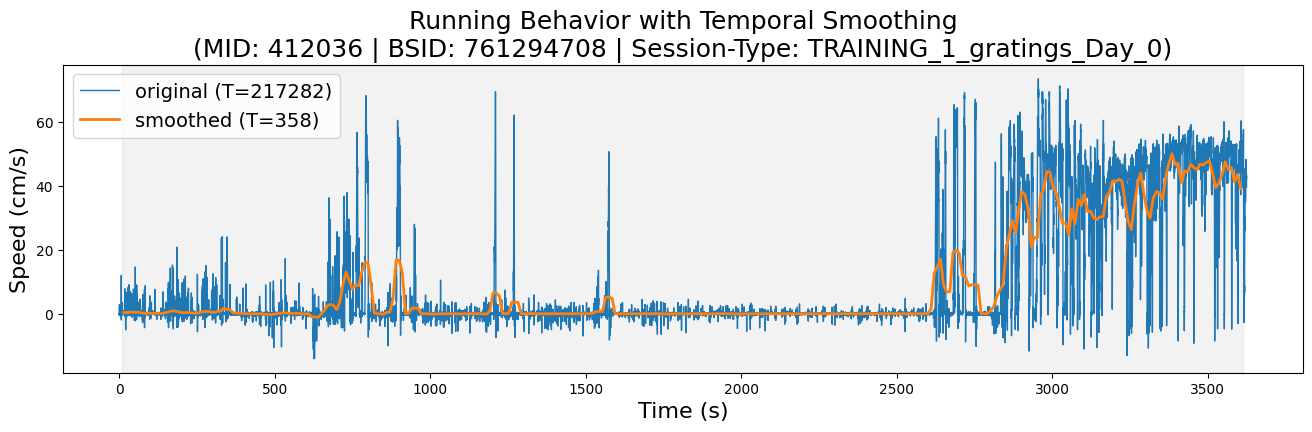

In [15]:
plt.figure(figsize=(16,4))

# original runing trace
plt.plot(run_times, run_speed,lw=1,label=f'original (T={len(run_times)})')

# smoothed running trace
plt.plot(smoothed_run_times, smoothed_run_speed,lw=2,label=f'smoothed (T={len(smoothed_run_times)})')

plt.axvspan(t0,tf,color='grey',alpha=0.1,zorder=0)

plt.ylabel('Speed (cm/s)',fontsize=16)
plt.xlabel('Time (s)',fontsize=16)
plt.legend(loc='upper left',fontsize=14)

plt.title(f'Running Behavior with Temporal Smoothing\n({title_template})',fontsize=18);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now we have a running trace that captures the slow timescale running pattern with significantly less time points - less than 1% the original size!

In [16]:
# we have a lot of data from more sessions than we can look at one-by-one
len(filtered_behavior_sessions)

1543

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Load sample datasets</h2>
    
Because there are a large number of sessions, let's load a subset of those sessions to address our question. Often looking a smaller sample dataset is sufficient to capture whether there's anything interesting within the complete dataset that may warrant further investigation.
    
To save time, we've randomly sampled datasets, applied the temporal smoothing, and filtered for the task stimulus block. See `create_running_asset.py` for an example of automating getting multiple datasets. 

In [17]:
# grab previously smoothed data
path_to_datacache = cache_dir / 'running_behavior'

filename = 'smoothed_running_traces.npy'
f = path_to_datacache / filename
running_mat = np.load(f)
    
filename = 'smoothed_timestamps.npy'
f = path_to_datacache / filename
timestamp_mat = np.load(f)

filename = 'smoothed_behavior_session_ids.npy'
f = path_to_datacache / filename
running_sessions = np.load(f)


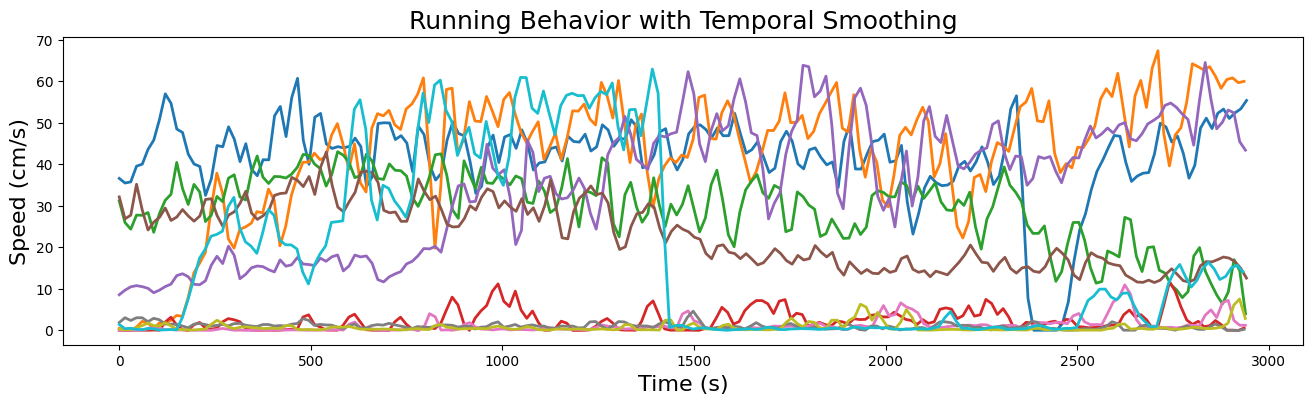

In [18]:
# plot the first 10 random session traces
plt.figure(figsize=(16,4))

for run_times, run_speed in zip(timestamp_mat[:10,:],running_mat[:10,:]):
    
    
    plt.plot(run_times, run_speed,lw=2)

plt.ylabel('Speed (cm/s)',fontsize=16)
plt.xlabel('Time (s)',fontsize=16)

plt.title('Running Behavior with Temporal Smoothing',fontsize=18);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Introduction to PCA</h2>       

Given that there is such a large number of sessions, we need to be able to succintly describe differences across sessions and be able to interpret those differences. Here's where PCA comes into play. Let's take a moment to build our computational intuition of what PCA accomplishes.



It is often helpful when using new algorithms to create a pseudo-dataset with some known simple structure to understand how the algorithm works. Here's a toy dataset we can use to visualize how PCA works. 

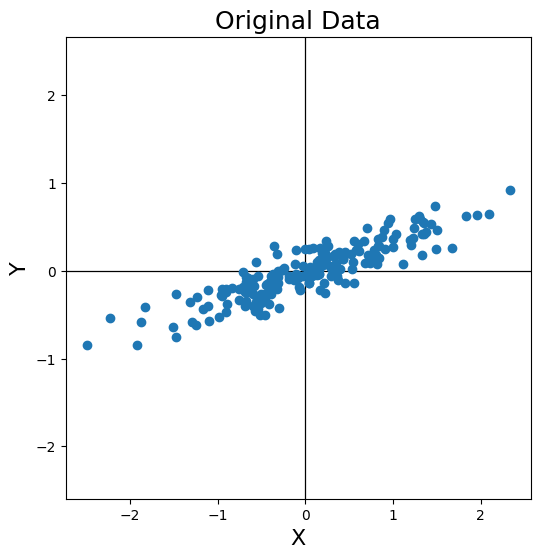

In [19]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.figure(figsize=(6,6));
plt.scatter(X[:, 0], X[:, 1])

plt.axhline(0,color='k',lw=0.9,zorder=0)
plt.axvline(0,color='k',lw=0.9,zorder=0)

plt.xlabel('X',fontsize=16)
plt.ylabel('Y',fontsize=16)

plt.title('Original Data',fontsize=18)
plt.axis('equal');

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Our toy dataset shows a positive correlation between variable X and variable Y. However, since our data is not a perfect line, there is some residual variation creating a slight negative correlation. Let's apply PCA and see how these relationships are captured by PCA.
    
Depending on the application, you may have measurements with different units. In order to bias our PCA model to variance explained by just a difference in the scaling of those units (e.g., 60 minutes = 3600 seconds), we use `StandardScaler` to rescale the data to be <i>centered</i> by subtracting the mean of our variables and dividing by their standard deviation. 
    
PCA uses `n_components` to determine how many principal components (PCs) to find. This parameter can either be set to an integer >1 to return a fixed number of PCs or be set to a proportion <1 to return a number of PCs that explains a fixed amount of variance (e.g., 0.95 corresponds to 95% the total variance).


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
X_scaled = StandardScaler().fit_transform(X)

In [22]:
# initiate our PCA model to extract 2 PCs, fit the model and transform the original data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This fit returns three important pieces of information: the `components_`,`explained_variance_` and `explained_variance_ratio_` which we can view using the following attributes. Components corresponds to the vectors or axes along which the data maximally varies (i.e., contain the most and second most variance). These vectors are merely the direction of variation while the explained variance corresponds to the squared-length of the vector. We can visualize these as vectors with respect to our data in both the original data space and the PC space. 


In [23]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [24]:
print(pca.explained_variance_)

[1.89888438 0.11116588]


In [25]:
print(pca.explained_variance_ratio_)

[0.94469498 0.05530502]


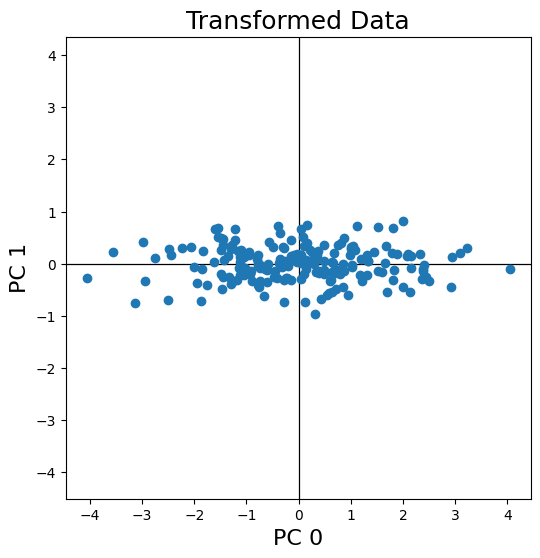

In [26]:
# plot transformed data in PC space
plt.figure(figsize=(6,6));
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.axhline(0,color='k',lw=0.9,zorder=0)
plt.axvline(0,color='k',lw=0.9,zorder=0)
    
plt.xlabel('PC 0',fontsize=16)
plt.ylabel('PC 1',fontsize=16)

plt.title('Transformed Data',fontsize=18)
plt.axis('equal');

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Notice how the data is rotated so that the direction the positive correlation in the original data now varies along the X-axis (PC 0) while the direction corresponding to the weaker negative correlation now varies along the Y-axis (PC 1)! This captures the basics of what PCA can accomplish. It finds a representation of the directions of covariation ordered by the amount of variance each direction explains. 

### PCA for dimensionality reduction for high dimensional data
    
In our toy example, we set the number of components to be equal to the dimensionality of our original data. However, we can find low dimensional representations of our data. Let's return to our investigation of running variability. For our analysis, we have a dataset with a fixed number of sessions and we want to reduce the dimensionality of the time domain. This will allow us to represent each session by a smaller number of points that captures the temporal differences in running patterns.

In [27]:
X = running_mat

N,T = running_mat.shape

# Center data (x-mu)/sigma
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA - scaled
pca_scaled = PCA(n_components=.95)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Apply PCA - unscaled
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
We initially set the number of components to find as the number that explains 95% of the variance across all sessions. We can look at the absolute amount for each component by using the `pca.explained_variance_` attribute. While we can visualize the absolute variance of each component, it's  standard practice to show the cumulative variance to emphasize the amount of variance PCA is explaining with each subsequent PC.

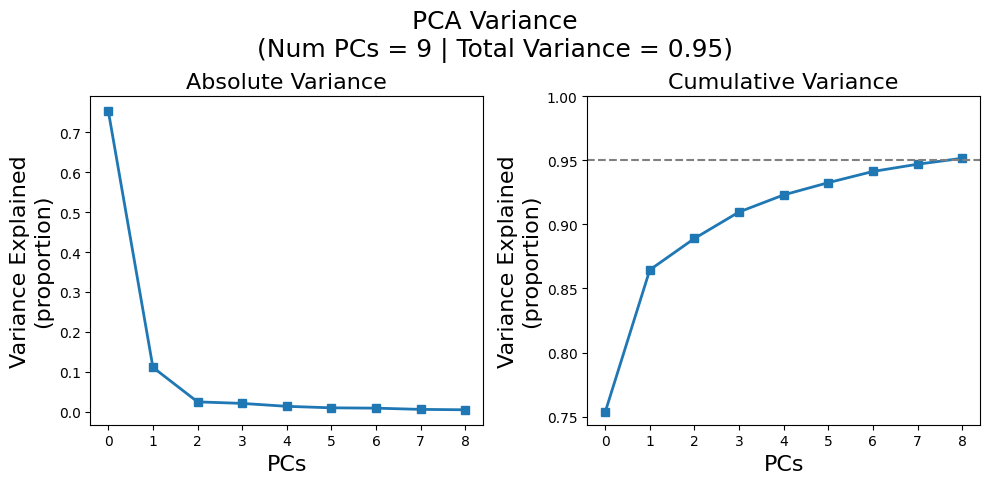

In [28]:
exp_variance = pca.explained_variance_ratio_
total_variance = np.sum(exp_variance)
num_pcs = pca.n_components_

fig, axs = plt.subplots(1,2,figsize=(10,5))

plt.suptitle(f'PCA Variance\n(Num PCs = %s | Total Variance = %.2f)'%(num_pcs,total_variance),fontsize=18,y=0.96)


axs[0].set_title('Absolute Variance',fontsize=16)
axs[0].plot(exp_variance,lw=2,marker='s')

axs[1].set_title('Cumulative Variance',fontsize=16)
axs[1].plot(np.cumsum(exp_variance),lw=2,marker='s')
axs[1].axhline(0.95,color='grey',linestyle='--')
axs[1].set_ylim(top=1)

for ax in axs:
    ax.set_ylabel('Variance Explained\n(proportion)',fontsize=16)
    ax.set_xlabel('PCs',fontsize=16)

plt.tight_layout();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
We can see that 9 PCs explain roughly 95% of the total variance with the dominant component (PC 0) explaing more than 70% of this variance. The next component (PC 1) explains roughly 10% of the total variance.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<b>Exercise 1:</b> Look at the scaled PCA results. Are they different in terms of their overall variance? Discuss why there is or is not a difference. 

In [29]:
# Exercise 1 - Unscaled vs scaled PCA















<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
Now let's look at how the data are spread along these two components. 

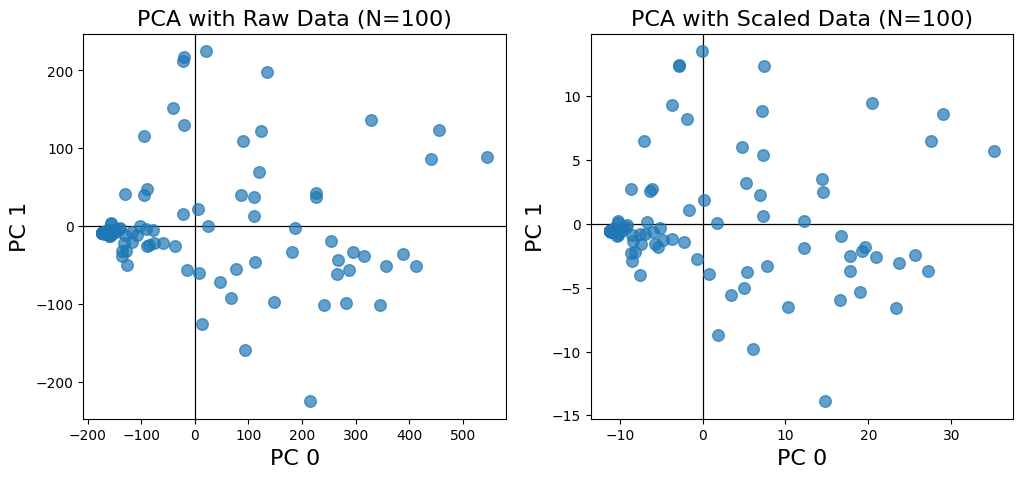

In [30]:
fig, axs = plt.subplots(1,2,figsize=(12,5))


axs[0].scatter(X_pca[:,0],X_pca[:,1],alpha=0.7,s=70)
axs[0].set_title('PCA with Raw Data (N=%s)'%N,fontsize=16)

axs[1].scatter(X_pca_scaled[:,0],X_pca_scaled[:,1],alpha=0.7,s=70)
axs[1].set_title('PCA with Scaled Data (N=%s)'%N,fontsize=16)


for ax in axs:
    ax.set_xlabel('PC 0',fontsize=16)
    ax.set_ylabel('PC 1',fontsize=16)
    
    ax.axhline(0,color='k',lw=0.9,zorder=0)
    ax.axvline(0,color='k',lw=0.9,zorder=0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
While visualizing PC space as defined by the spatial components (across sessions) is useful for exploring the overall running variability in the data, visualizing the temporal components helps us interpret what PCA is identifying as the dominant temporal patterns in running behavior. We can plot this using `pca.components_`.

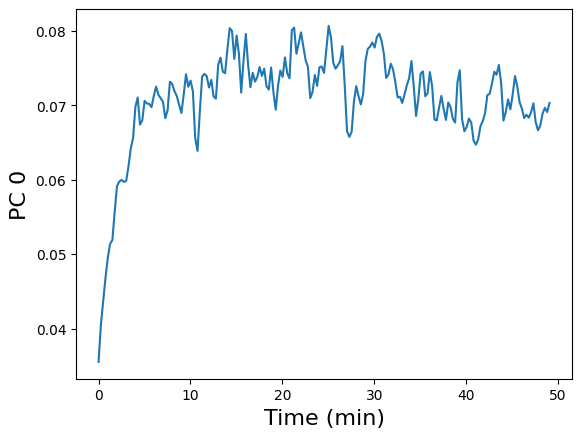

In [31]:
plot_times = np.mean(timestamp_mat,axis=0)/60.

plt.plot(plot_times,pca.components_[0])
plt.ylabel('PC 0',fontsize=16)
plt.xlabel('Time (min)',fontsize=16);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
We see that the first PC shows a changing in running across the first ~10 minutes of a session. From our previous plot of the spatial coefficients for across sessions, we can interpret this as mice have a tendency to either accelerate to a relatively fixed speed (positive coefficients) or decelerate to a relatively fixed speed (negative coefficients). 
    

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
<b>Exercise 2:</b> Plot the next two temporal components (PC1 and PC2).

In [32]:
# Exercise 2 - Visualize more temporal components















<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<b>Exercise 3:</b> Provide a brief interpretation of each component.

Write here...
  
  
        
      
      
      
      
      
       
      
      
  
  
  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
## Further investigating and interpreting PCA

The real power of PCA is its ability to enable fast exploratory analysis of multiple factors that could be contributing to variability in our data. Let's recap what we discovered so far. We found that running behavior is relatively spread out in PC space. While there is a dense cluster of sessions with spatial negative spatial coefficients for PC0 indicating a tendencies for mice to slow down during the first 10 minutes of a session. In contrast, we also saw that many mice speed up during the same time window. In order to substatiate that this could actually meaningful, we need to be able to address two questions:

### Question 1:
Is our interpretation supported by the actual data? In other words, do we see these patterns using the original running traces? 
    

### Question 2:
What factors could explain our interpretation of the principal components across mice and sessions? Mouse-to-mouse variability? Or other factors contributing to this variability?
    
    
    

In [33]:
# get mouse IDs
mouse_ids = np.array([filtered_behavior_sessions[filtered_behavior_sessions.index==bsid].mouse_id.iloc[0] for bsid in running_sessions])

unique_mice = np.unique(mouse_ids)

len(unique_mice)

35

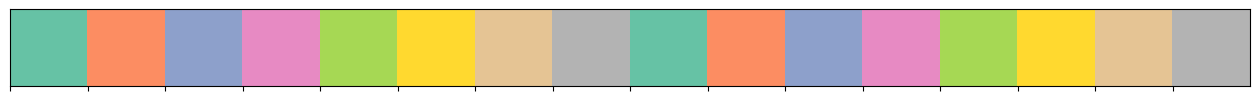

In [34]:
# let's get unique colors to visualize mouse-to-mouse variability
mouse_colors = sns.color_palette('Set2',len(unique_mice))
sns.palplot(mouse_colors[:16])

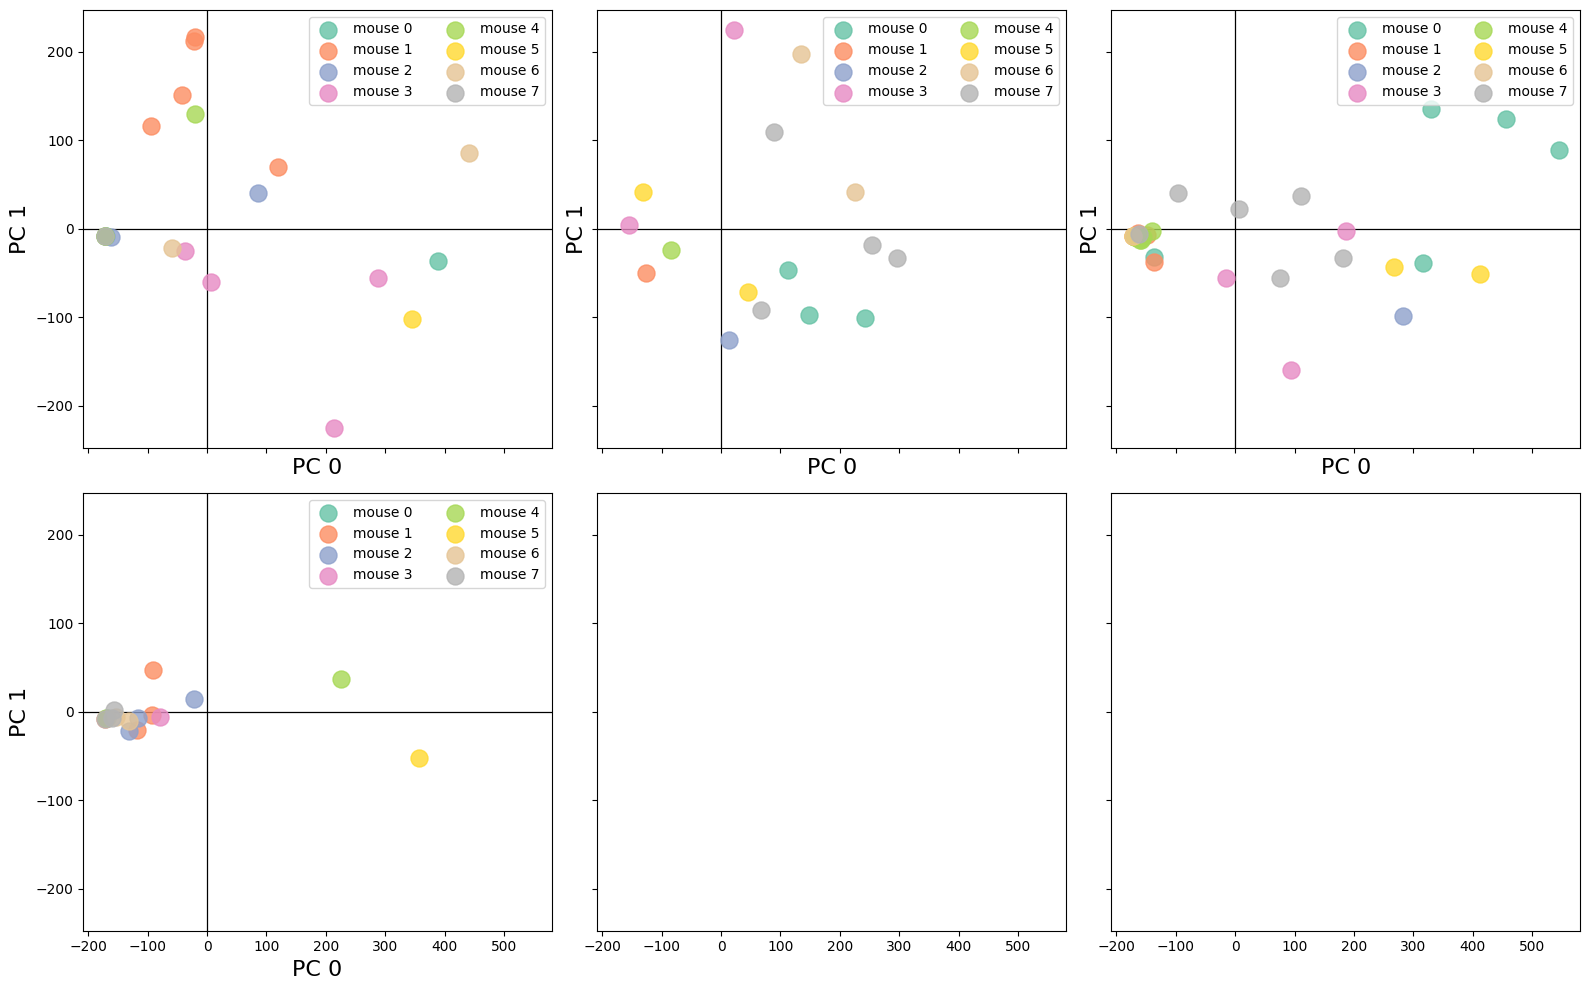

In [35]:
# for now let's look at PC space in batches of 8 - we only have so many unique colors
num_batches = len(unique_mice)//8

fig, axs = plt.subplots(2,3,figsize=(16,10),sharey=True,sharex=True)
axs = axs.ravel()

for batch_k in range(num_batches):
    
    plot_mice = unique_mice[batch_k*8:(batch_k+1)*8]
    
    for i, mouse_id in enumerate(plot_mice):

        plot_cond = (mouse_ids==mouse_id)

        axs[batch_k].scatter(X_pca[plot_cond,0],X_pca[plot_cond,1],color=mouse_colors[i],alpha=0.8,s=150,label='mouse %s'%i)

    axs[batch_k].legend(ncols=2)
    axs[batch_k].set_xlabel('PC 0',fontsize=16)
    axs[batch_k].set_ylabel('PC 1',fontsize=16)

    axs[batch_k].axhline(0,color='k',lw=0.9,zorder=0)
    axs[batch_k].axvline(0,color='k',lw=0.9,zorder=0)
    
plt.tight_layout();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
Looking within a single panel, sessions appear to be grouped for some mice while others appear to more spread out for some mice. Looking across panels, we can also see that groups of mice share similar dominant running behavior. However, we can conclude that some other factor may be contributing to the observed variability in running. 
    
We visualized these across panels only because we had too many mice for a unique color palette. However, as you explore other factors contributing to behavioral variability, it'll be much more effective showing multiple factors within the same panel. 
    
Now that we've built out the basic concepts and tools you can apply to the scientific question, work through the subsequent problem set to dive deeper into the data!


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Problem Set      

1. Plot the original running traces to support your interpretations of PC1 and PC2
2. Color the PC scatter plot using different conditions to identify putative predictors of behavior variability across sessions and mice
3. Provide interpretations for your identified putative predictors
4. Plot two example groups selected based on your predictors to support your interpretation

        
<b>Mouse-specific predictors:</b>    
    - cre_line  
    - sex  
    - age_in_days  

<b>Experimental predictors:</b>  
    - project_code (if including other datasets)  
    - session_type 
    
<b>Task learning performance predictors:</b>  
    - session_number  
    - prior_exposures  
    - hit_trial_count  
    - engaged_trial_count   
    - catch_trial_count  
    - false_alarm_trial_count  
    
    
### Further Explorations

Using the `create_running_asset.py` script, extend your analysis to other datasets (e.g., Visual Behavior Task 1B, Visual Behavior Neuropixels, Visual Coding). Does running behavior predict differences across experimental conditions (active vs passive) or between mice performing the same task but require different imaging conditions (optical physiology vs electrophysiology)?
